In [1]:
!pip install tensorflow
!pip install matplotlib


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [3]:
train_dir = 'dataset/train'
validation_dir = 'dataset/validation'

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'  # Binary classification (Dog or Cat)
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Sigmoid for binary output
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [5]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,  # depends on your dataset size
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50
)



Epoch 1/10
100/100 [==============================] - 28s 280ms/step - loss: 0.7262 - accuracy: 0.5138 - val_loss: 0.6908 - val_accuracy: 0.5650
Epoch 2/10
100/100 [==============================] - 29s 286ms/step - loss: 0.6835 - accuracy: 0.5531 - val_loss: 0.6861 - val_accuracy: 0.5763
Epoch 3/10
100/100 [==============================] - 30s 303ms/step - loss: 0.6364 - accuracy: 0.6398 - val_loss: 0.6560 - val_accuracy: 0.5938
Epoch 4/10
100/100 [==============================] - 32s 318ms/step - loss: 0.5779 - accuracy: 0.7006 - val_loss: 0.6461 - val_accuracy: 0.6594
Epoch 5/10
100/100 [==============================] - 32s 321ms/step - loss: 0.5377 - accuracy: 0.7244 - val_loss: 0.5533 - val_accuracy: 0.7194
Epoch 6/10
100/100 [==============================] - 32s 321ms/step - loss: 0.4915 - accuracy: 0.7646 - val_loss: 0.5246 - val_accuracy: 0.7487
Epoch 7/10
100/100 [==============================] - 35s 347ms/step - loss: 0.4561 - accuracy: 0.7778 - val_loss: 0.5163 - val_ac

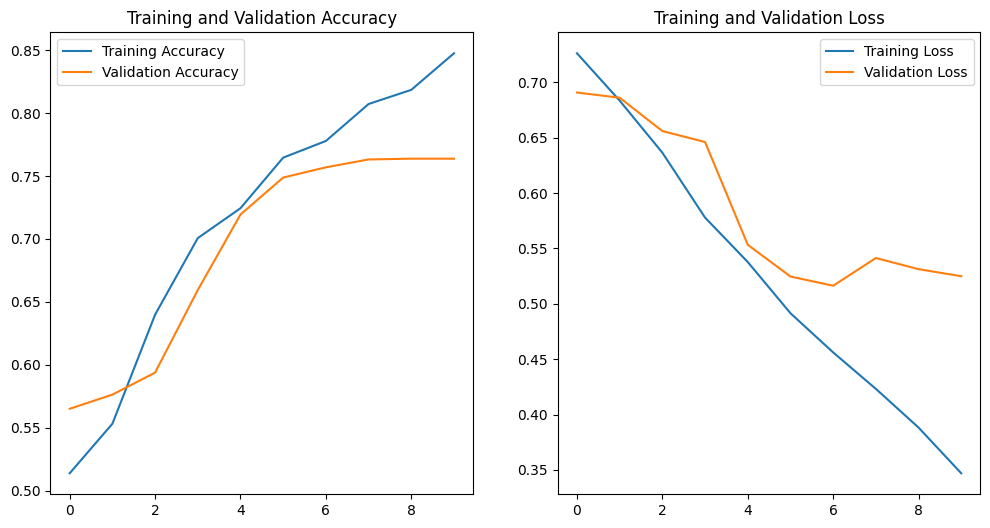

In [6]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()


In [10]:
import numpy as np
from tensorflow.keras.preprocessing import image

img_path = 'dataset/test/dog2.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

prediction = model.predict(img_tensor)

if prediction[0] > 0.5:
    print("It's a Dog!")
else:
    print("It's a Cat!")


1/1 [==============================] - 0s 16ms/step
It's a Dog!
